# __DATA 5690/6690: Computational Methods for FinTech__

---

<br>

## __An Introduction to Limit Theorems & the Monte Carlo Method__             <br>

DATA 5690/6690: Computational Methods for FinTech <br>
Tyler J. Brough <br>
Last Update: February 1, 2024 <br>
<br>
<br>

---

# __Code Imports__

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# __An Introduction to Limit Theorems & the Monte Carlo Method__

This set of notes introduces some basic concepts regarding statistical limit theory as well as the Monte Carlo method.



## ___Statistical Limit Theory___

### Limiting Distribution

Consider a sequence of random variables $Y_{1}, Y_{2}, \ldots$ with a corresponding sequence of CDFs $G_{1}(y), G_{2}(y), \ldots$ so that for each $n = 1, 2, \ldots$

$$G_{n}(y) = P[Y_{n} \le y]$$

***Definition***

If $Y_{n} \sim G_{n}(y)$ for each $n = 1, 2, \ldots$, and if for some CDF $G(y)$

$$\lim_{n\to\infty} G_{n}(y) = G(y)$$

for all values $y$ at which $G(y)$ is continous, then the sequence $Y_{1}, Y_{2}, \ldots$ is said to **converge in distribution** to $Y \sim G(y)$, denoted by $Y_{n} \xrightarrow{d} Y$. The distribution corresponding to the CDF $G(y)$ is called the **limiting distribution** of $Y_{n}$.

### Basic Convergence Concepts



***Definition***

A sequence of random variables, $Y_{1}, Y_{2}, \ldots$, is said to **converge in probability** to the random variable $Y$ if

$$\lim_{n\to\infty} P[|Y_{n} - Y| < \varepsilon] = 1$$

for every $\varepsilon > 0$.


***Definition***

The sequence **converges almost surely** to $Y$ if

$$P[lim_{n\to\infty} |Y_{n} - Y| < \varepsilon] = 1$$

for every $\varepsilon > 0$.

<br>

### The Law of Large Numbers

***Definition***

The law which states that the larger a sample, the nearer its mean is to that of the parent population from which the sample is drawn. More formally: for every $\varepsilon > 0$, the probability

$$\{|\bar{Y} - Y| > \varepsilon \} \rightarrow 0 \quad \mbox{as} \quad n \rightarrow \infty$$

where $n$ is the sample size, $\bar{Y}$ is the sample mean, and $\mu$ is the parent mean.

More rigorous definitions are the following:

For i.i.d sequences of one-dimensional random variables $Y_{1}, Y_{2}, \ldots$, let $\bar{Y}_{n} = \frac{1}{n} \sum\limits_{i=1}^{n} Y_{i}$.

The *weak law of large numbers* states that $\bar{Y}_{n}$ converges in probability to $\mu = E\{Y_{i}\}$ if $E\{|Y_{i}|\} < \infty$.

The *strong law of large numbers* states that $\bar{Y}_{n}$ converges almost surely to $\mu$ if $E\{|Y_{i}|\} < \infty$.

Both results hold under the more stringent but easily checked condition that $var\{Y_{i}\} = \sigma^{2} < \infty$.

#### Using Simulation to Check the Law of Large Numbers

We can use simulation to check the Law of Large Numbers. Consider a fair die with six sides and outcomes $Y = \{1, 2, 3, 4, 5, 6\}$, each with $P[Y_{i} = y] = \frac{1}{6}$. The true mean is

$$ \mu = E\{Y\} = \frac{1}{6}[1 + 2 + 3 + 4 + 5 + 6] = 3.5$$

We can verify this in `Python`:

In [ ]:
x = np.arange(1,7)
mu = np.mean(x)

In [ ]:
mu

3.5

Now let's simulate some rolls of the die and collect some data. We will let our sample size increase and plot the estimated mean.

We can simulate a single roll of the die as follows:


In [ ]:
np.random.randint(1,7)

5

We can also simulate many at once as follows:

In [ ]:
np.random.randint(1,7, size=100)


array([4, 3, 1, 5, 1, 4, 4, 1, 1, 1, 2, 5, 5, 2, 2, 6, 3, 4, 1, 6, 4, 5, 5,
       5, 1, 5, 3, 4, 5, 1, 1, 5, 4, 5, 2, 6, 1, 3, 1, 1, 1, 6, 4, 5, 2, 6,
       1, 4, 2, 6, 5, 1, 4, 1, 1, 4, 5, 3, 3, 3, 2, 1, 5, 4, 4, 2, 5, 1, 2,
       4, 4, 3, 6, 6, 4, 2, 6, 3, 4, 6, 5, 4, 3, 5, 2, 4, 6, 1, 6, 5, 5, 1,
       2, 3, 4, 4, 3, 5, 1, 1])

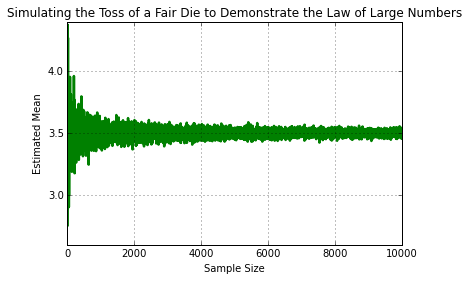

In [ ]:
m = 10000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.randint(1,7, size=sizes[i])
    means[i] = y.mean()

plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating the Toss of a Fair Die to Demonstrate the Law of Large Numbers")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

We can do a similar simulation for the flipping of a fair coin. We can simulate the flip of a coin with the Binomial distribution as follows:

In [ ]:
np.random.binomial(1, 0.5, 100)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0])

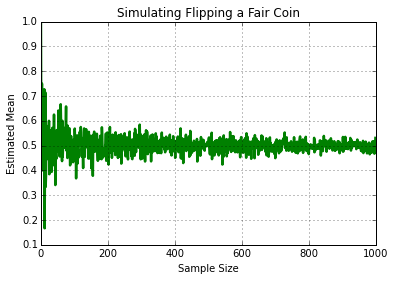

In [ ]:
m = 1000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.binomial(1, 0.5, sizes[i])
    means[i] = y.mean()

plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating Flipping a Fair Coin")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

### The Central Limit Theorem




The theorem that states that, if samples of size $n$ are taken from a parent population with mean $\mu$ and standard deviation $\sigma$, then the distribution of their means will be approximately normal with:

$$
{\large \mbox{Mean} = \mu}
$$

and

$$
{\large \mbox{Standard deviation} = \frac{\sigma}{\sqrt{n}}}
$$

As the sample size $n$ increases, this distribution approaches the normal distribution with increasing accuracy. Thus in the limit, as $n \rightarrow \infty$, the distribution of the sample means $\rightarrow$ Normal, mean $\mu$, standard deviation $\sigma / \sqrt{n}$.

If the parent population is itself normal, the distribution of the sample means will be normal, whatever the sample size. If the parent population is of finite size $N$, two possibilties arise:

1. If the sampling is carried out with replacement, the theorem stands as stated;
2. If there is no replacement, the standard deviation of the sample mean is:

$$\frac{\sigma}{\sqrt{n}} \sqrt{\frac{N - n}{N - 1}}$$

The factor $\sqrt{\frac{N - n}{N - 1}}$ is called the **finite population correction.**

The central limite theorem provides the basis for much of sampling theory; it can be summed up, as follows. If $n$ is not small, the sampling distribution of the means is approximately normal, has $\mbox{mean} = \mu$ (the parent mean), and has standard deviation $\sigma / \sqrt{n}$ (where $\sigma$ is the parent standard deviation).

We can use Monte Carlo simulation to build intuition for the central limit theorem as well. Consider the mean of a sample from an exponential distribution. Recall that the density of the exponential distribution is the following:

$$
{\large f(x) = \frac{1}{\theta}e^{-x/\theta}}
$$

for $\theta > 0$ and $x > 0$.

In `Python` we can simulate from the exponential distribution as follows:

In [ ]:
np.random.exponential(size=100)

array([2.83039312, 1.52191146, 0.60706911, 0.20967357, 1.18320841,
       0.86010348, 2.34753876, 0.27555288, 0.10642358, 1.74288497,
       5.1577941 , 1.73598974, 0.72414097, 0.14854028, 1.22169333,
       0.18046112, 0.32172469, 3.64126285, 0.43529306, 0.51729251,
       0.86800414, 0.60195517, 2.6512422 , 1.45860976, 0.1033542 ,
       0.28050894, 0.03277623, 0.35433892, 0.14567187, 0.57801448,
       0.27347574, 0.40431055, 0.24140367, 0.59358338, 0.69021793,
       2.94256986, 0.74173822, 0.29683751, 0.95116848, 1.24770408,
       1.19542332, 0.67732653, 0.49105066, 0.77615889, 0.31336375,
       0.14565758, 0.84107317, 0.9397182 , 1.83336497, 0.21963703,
       0.18852259, 0.10113053, 0.2200447 , 1.22034291, 0.53754981,
       0.49644312, 0.29742158, 1.89633212, 0.76366103, 0.14920422,
       0.04199617, 2.39237964, 0.93712063, 1.09866996, 1.53345872,
       0.03622322, 0.07528282, 2.50363803, 0.23158946, 3.81566481,
       1.29304639, 1.15553628, 0.94013324, 0.58526184, 1.25716

In [ ]:
%matplotlib inline

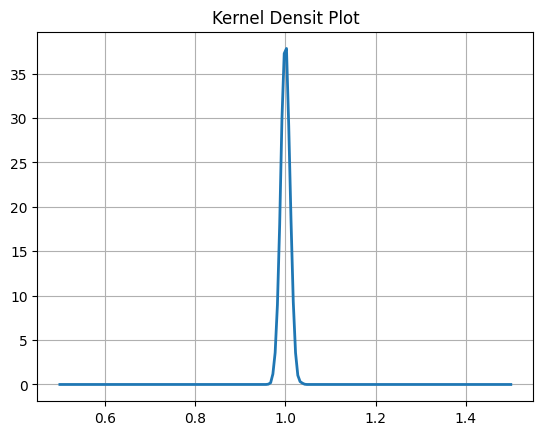

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

m = 10_000
n = 10_000 # start at 10 and move up to 10000

means = np.zeros((m,))

for i in range(m):
    x = np.random.exponential(size=n)
    means[i] = x.mean()

density = gaussian_kde(means)
xs = np.linspace(0.5,1.5,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), lw = 2)
plt.title("Kernel Densit Plot")
plt.grid(True)
plt.show()

## ___The Monte Carlo Method___



Now with that statistical limit theory as a background we can turn our attention to introducting the Monte Carlo Method.

Many quantities of interest in inferential statistical analyses can be expressed as the expectation of a function of a random variable, say $E\{h(Y)\}$. Let $f$ denote the density of $Y$, and $\mu$ denote the expectation of $h(Y)$ with respect to $f$. When an i.i.d random sample $Y_{1}, \ldots, Y_{n}$ is obtained from $f$, we can approximate $\mu$ by a sample average:

$$\hat{\mu}_{MC} = \frac{1}{n} \sum\limits_{i=1}^{n} h(Y_{i}) \rightarrow \int\limits h(Y)f(Y)dy = \mu$$

as $n \rightarrow \infty$, by the strong law of large numbers. Further, let $v(y) = [h(Y) - \mu]^{2}$, and assume that $H(Y)^{2}$ has finite expectation under $f$. Then the sampling variance of $\hat{\mu}_{MC}$ is $\sigma^{2}/n = E\{v(Y)/n\}$, where the expectation is taken with respect to $f$. A similar Monte Carlo approach can be used to estimate $\sigma^{2}$ by

$$\hat{var}\{\hat{\mu}_{MC}\} = \frac{1}{n - 1} \sum\limits_{i=1}^{n} [h(Y_{i}) - \hat{\mu}_{MC}]^{2}$$

When $\sigma^{2}$ exists, the central limit theorem implies that $\hat{\mu}_{MC}$ has an approximate normal distribution for large $n$, so approximate confidence bounds and statistical inference for $\mu$ follow.

Monte Carlo integration offers slower convergence than other numerical methods for integration, so why should we use it? It turns out that Monte Carlo integration is less subject to the curse of dimensionality as other methods, so the Monte Carlo method is especially helpful for multidimensional problems. Also, some methods like quadrature require smoothness, while Monte Carlo ignores smoothness alrogether.

### Approximating a Deterministic Definite Integral with the Monte Carlo Method

Let's consider the simple function:

$$f(x) = 4 - 4x^{2}$$

and the following definite integral:

$$\int\limits_{0}^{1} (4 - 4x^{2})dx$$

This is a simple function to integrate and we can use analytical methods from calculus to solve it as follows:

$$\int\limits_{0}^{1} (4 - 4x^{2})dx = (4x - \frac{4}{3}x^{3})\bigm|_{0}^{1} = (4(1) - \frac{4}{3}(1)^{3}) - (4(0) - \frac{4}{3}(0)^{3}) = \frac{8}{3} \approx 2.6667$$

A useful tool if your calculus skills are rusty is ***[Wolfram Alpha](http://www.wolframalpha.com/input/?i=Integrate+4+-+4x%5E2+from+0+to+1)***.

To use the Monte Carlo method to solve this integral numerically, we turn it into an expectation over a random variable:

$$\hat{\mu}_{MC} = \frac{1}{n} \sum\limits_{i=1}^{n} (4 - 4X_{i}^{2})$$

where the $X_{i}$ are random draws from a uniform distribution on the interval $[0,1]$ for $i = 1, \ldots, n$.

Let's see how we can accomplish this in `Python`:

In [5]:
import numpy as np

np.random.seed(42)

def f(x):
    y = 4 - 4 * x ** 2
    return y

def main():
    # Generate random values between 0 and 1
    u = np.random.uniform(0, 1, size = 10**6)

    # Evaluate the function for each value u
    y = f(u)

    # Approximate the integral with the mean
    muhat = np.mean(y)

    # Print the answer
    print("The Monte Carlo estimate of the integral is: %s" % round(muhat, 4))

if __name__ == "__main__":
    main()

The Monte Carlo estimate of the integral is: 2.6655


In [ ]:
u = np.random.uniform(0, 1, size = 10**6)

In [ ]:
f(u)

array([3.98979417, 3.08527439, 3.04254951, ..., 3.90879343, 3.99946903,
       2.62864217])

In [ ]:
for i in range(u.shape[0]):
    print(f(u[i]))

Streaming output truncated to the last 5000 lines.
1.7539348494927602
1.0310231320835843
3.3882374949285006
3.343399410561573
2.020581551627319
3.9777525341746722
1.900869977887607
3.9999758831943315
2.655192337597388
3.4131246606788546
0.9977086829164574
3.325313110072539
0.8198496843126812
3.435395664542756
2.561701929429335
2.182879044330929
3.5332315245006103
0.3836533931239625
0.8182782389233938
0.9219209817754983
3.999714587239548
2.7243360836895834
1.0520792144986504
0.5692511492078292
3.8942141059772624
3.714096713298051
3.9978888415984803
1.1965795302513307
3.375860632740297
2.0455558535823295
2.9864605585909
3.9883466500412847
3.994039768030157
3.5823216325240814
2.109541438052144
2.6222612569728385
3.0294953970772416
2.288863955572958
1.6167490823901396
0.484234923774685
1.5641961351982165
3.9098408132864746
1.8120567236207705
3.613354129071735
2.0739630230460624
3.785890249597312
3.7139217408585425
3.539296468636055
3.748440408110979
3.9757734365276436
2.1899624254584857
3.

KeyboardInterrupt: 

### Using the Monte Carlo Method for Option Pricing



We saw that we could we could write the single-period Binomial option pricing model as:

$$C_{0} = e^{-rT} [C_{u} p^{\ast} - C_{d}(1 - p^{\ast})]$$

which we said was the risk-neutral interpretation of the model. We also saw that we could think of the model as containing two terms:

1. An expected cash flow from holding the option at expiration: $[C_{u} p^{\ast} - C_{d}(1 - p^{\ast})]$.
2. A discount factor to bring the expect cash flow to present value: $e^{-rT}$.

We can write this generically as:

$$C_{0} = e^{-rT} E\{CF_{T}\}$$

where $CF_{T}$ is the cash flow from holding the option at expiration. As we will see this holds even for more complex price dynamics beyond the Binomial tree. We will see that if we can simulate from a given stock price process (whatever it be), that we can price the option by simulating many stock price paths, applying the option payoff function, taking a sample average and discounting to present value:

$$C_{0} = \frac{1}{n} \sum\limits_{i=1}^{n} C_{0,i}$$

where $C_{0,i} = e^{-rT} C_{T,i}$ and $C_{T,i} = \max{(S_{T,i} - K, 0)}$, and $S_{T,i}$ is the $i^{th}$ terminal simulated stock price for $i = 1, \ldots, n$ for a call option. A put option would be similar, but would apply the put payoff function instead.

As we will see this is a very simple way to price options and will apply even for very complex stock price dynamics such as jumps in price and stochastic volatility, which seem to be required by the data.

In [ ]:
def adder(a, b):
    return a + b

In [ ]:
adder(1, 3)

4

In [ ]:
adder(1.0, 3.2)

4.2

In [ ]:
adder("1", "2")

'12'